In [68]:
import os

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

# Read data + augmentation

In [2]:
class_names = ['rock', 'paper', 'scissors']

def read_dataset():
    color_transform = np.array([65536, 256, 1])
    X, y = [], []

    for class_id, class_name in enumerate(class_names):
        for filename in os.listdir(f'../data/rockpaperscissors/{class_name}'):
            image = np.array(Image.open(f'../data/rockpaperscissors/{class_name}/{filename}'))
            X.append(image.dot(color_transform).flatten())
            y.append(class_id)

    permutation = np.random.permutation(len(y))
    return np.array(X)[permutation], np.array(y)[permutation]

In [3]:
X, y = read_dataset()

In [4]:
TRAIN_SIZE = int(0.8 * y.shape[0])
X_train, y_train = X[:TRAIN_SIZE], y[:TRAIN_SIZE]
X_test, y_test = X[TRAIN_SIZE:], y[TRAIN_SIZE:]

# Feature extraction (dimension reduction)

### PCA

In [5]:
from sklearn.decomposition import PCA

In [23]:
pca_model = PCA(n_components=100)
X_pca = pca_model.fit_transform(X)

In [24]:
X_pca_train = X_pca[:TRAIN_SIZE]
X_pca_test = X_pca[TRAIN_SIZE:]

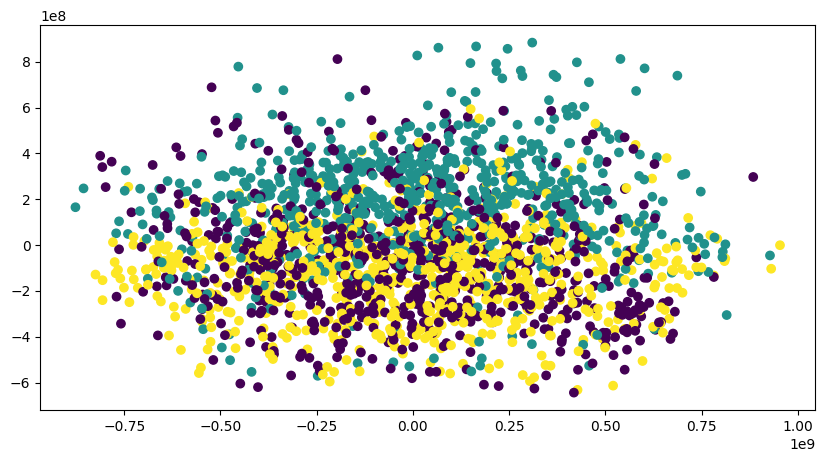

In [69]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.show()

### t-SNE

In [48]:
from sklearn.manifold import TSNE

In [65]:
tsne_model = TSNE(n_components=2)
X_tsne = tsne_model.fit_transform(X)

X_tsne_train = X_tsne[:TRAIN_SIZE]
X_tsne_test = X_tsne[TRAIN_SIZE:]

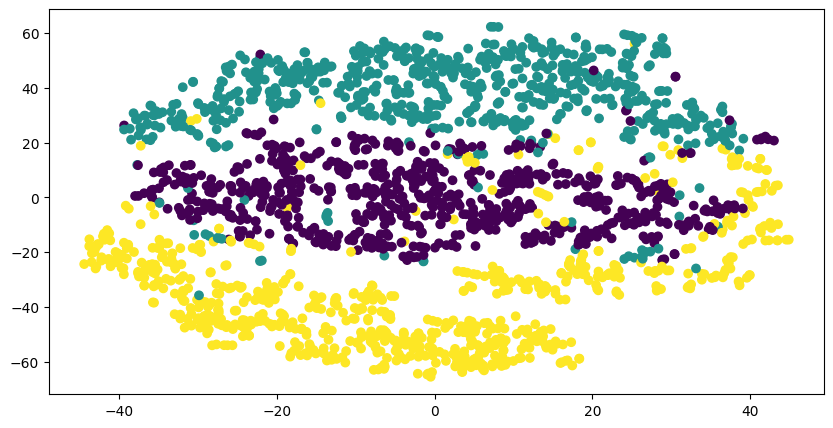

In [70]:
# this is cool
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.show()

### CNN ???

# Classification

### Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

##### Original data

In [10]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
decision_tree_classifier.score(X_test, y_test)

0.8447488584474886

##### PCA transformed data

In [25]:
decision_tree_classifier_pca = DecisionTreeClassifier()
decision_tree_classifier_pca.fit(X_pca_train, y_train)
decision_tree_classifier_pca.score(X_pca_test, y_test)

0.8013698630136986

##### t-SNE transformed data

In [63]:
decision_tree_classifier_tsne = DecisionTreeClassifier()
decision_tree_classifier_tsne.fit(X_tsne_train, y_train)
decision_tree_classifier_tsne.score(X_tsne_test, y_test)

0.9406392694063926

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

##### Original data

In [41]:
random_forest_classifier = RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(X_train, y_train)
random_forest_classifier.score(X_test, y_test)

0.9452054794520548

##### PCA tranformed data

In [46]:
random_forest_classifier_pca = RandomForestClassifier(n_estimators=100)
random_forest_classifier_pca.fit(X_pca_train, y_train)
random_forest_classifier_pca.score(X_pca_test, y_test)

0.9474885844748858

##### t-SNE tranformed data

In [64]:
random_forest_classifier_tsne = RandomForestClassifier(n_estimators=100)
random_forest_classifier_tsne.fit(X_tsne_train, y_train)
random_forest_classifier_tsne.score(X_tsne_test, y_test)

0.958904109589041

### Test saving model

In [71]:
import pickle

In [72]:
# save model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_classifier_pca, file)

In [73]:
# read model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [75]:
loaded_model.score(X_pca_test, y_test)

0.9474885844748858